In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot


pyo.init_notebook_mode(connected=True)
cf.go_offline()
from plotly.offline import init_notebook_mode,plot,iplot
plotly.io.renderers.default = 'colab'

In [3]:
from google.colab import files
data = files.upload()

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/India.csv',parse_dates=['date'])

In [5]:
df.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,0,0,0
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,191181,191181,0
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350815...,224301,224301,0
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,454049,454049,0
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,674835,674835,0


In [6]:
df.tail()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated
192,India,2021-08-04,"Covaxin, Oxford/AstraZeneca, Sputnik V",https://www.mohfw.gov.in/,489342295,381126275,108216020
193,India,2021-08-05,"Covaxin, Oxford/AstraZeneca, Sputnik V",https://www.mohfw.gov.in/,495327595,385631050,109696545
194,India,2021-08-06,"Covaxin, Oxford/AstraZeneca, Sputnik V",https://www.mohfw.gov.in/,501009609,390041560,110968049
195,India,2021-08-07,"Covaxin, Oxford/AstraZeneca, Sputnik V",https://www.mohfw.gov.in/,506810492,394378151,112432341
196,India,2021-08-08,"Covaxin, Oxford/AstraZeneca, Sputnik V",https://www.mohfw.gov.in/,508664759,395667593,112997166


In [7]:
df['vaccine'].unique()

array(['Covaxin, Oxford/AstraZeneca',
       'Covaxin, Oxford/AstraZeneca, Sputnik V'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 197 non-null    object        
 1   date                     197 non-null    datetime64[ns]
 2   vaccine                  197 non-null    object        
 3   source_url               197 non-null    object        
 4   total_vaccinations       197 non-null    int64         
 5   people_vaccinated        197 non-null    int64         
 6   people_fully_vaccinated  197 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 10.9+ KB


In [9]:
df.drop(['location','source_url'],axis=1,inplace=True)

In [10]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated
count,1.970000e+02,1.970000e+02,1.970000e+02
mean,1.645745e+08,1.328614e+08,3.171314e+07
std,1.494584e+08,1.182228e+08,3.157978e+07
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.092234e+07,1.716830e+07,3.754041e+06
50%,1.448792e+08,1.212633e+08,2.361595e+07
75%,2.583259e+08,2.104430e+08,4.788295e+07
max,5.086648e+08,3.956676e+08,1.129972e+08


In [11]:
df['month'] = df['date'].dt.month


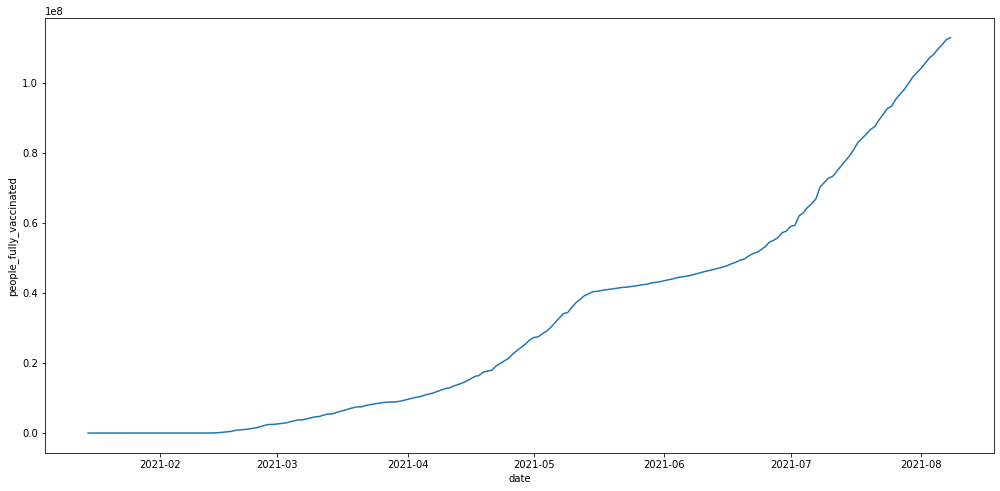

In [12]:
sns.lineplot(x='date',y='people_fully_vaccinated',data=df)

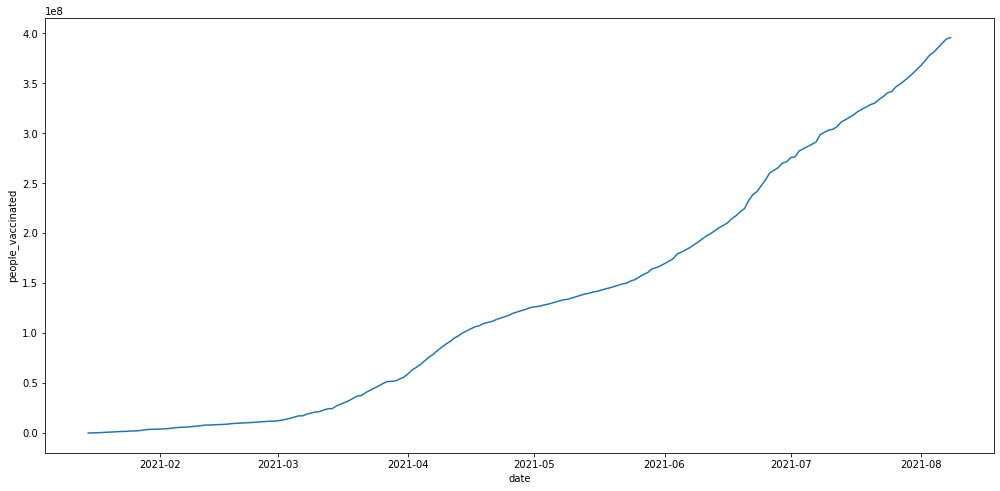

In [13]:
sns.lineplot(x='date',y='people_vaccinated',data=df)

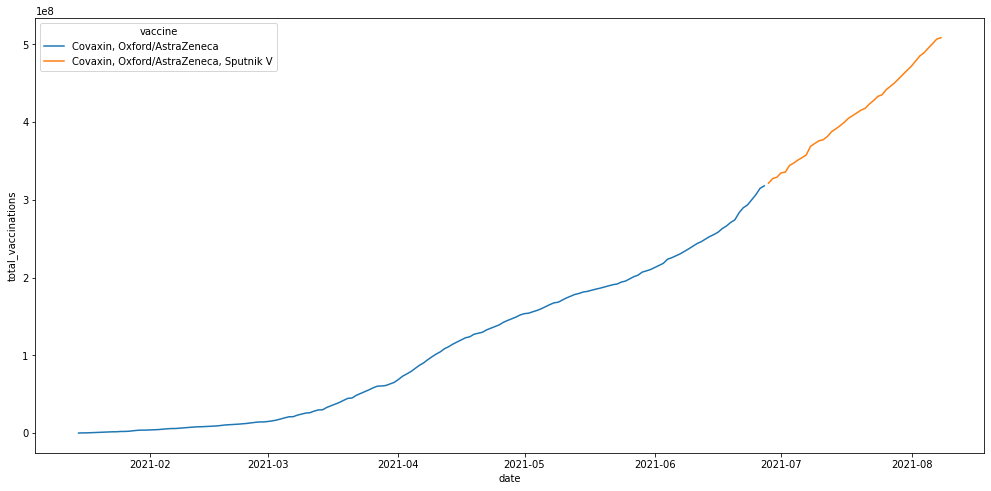

In [14]:
sns.lineplot(x='date',y='total_vaccinations',data=df,hue='vaccine')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



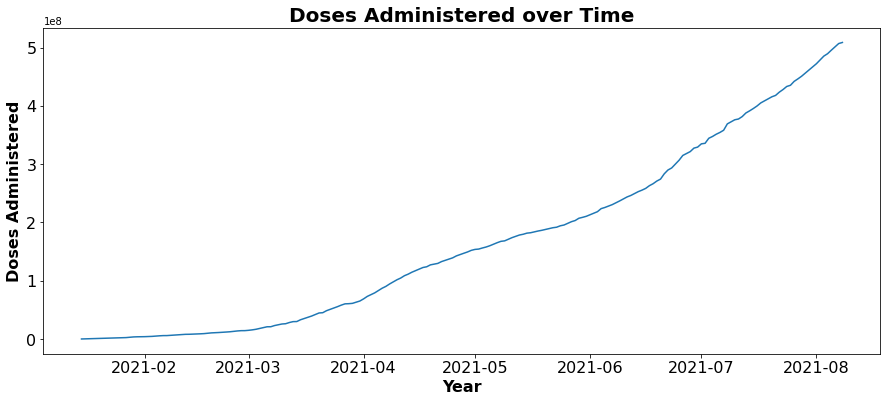

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(df['date'], df['total_vaccinations'] )

ax.set_title('Doses Administered over Time', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Doses Administered', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Total Doses Administered')

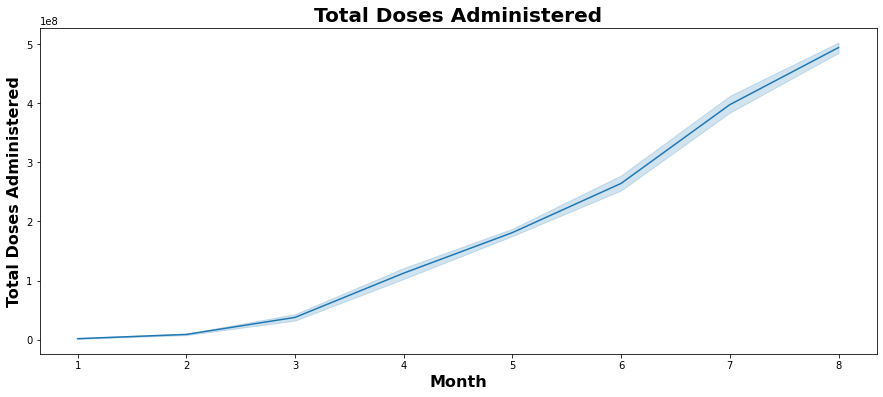

In [16]:

fig, ax = plt.subplots(figsize=(15, 6))


sns.lineplot(df['month'], df['total_vaccinations'])
ax.set_title('Total Doses Administered', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Total Doses Administered', fontsize = 16, fontdict=dict(weight='bold'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Total Doses Administered')

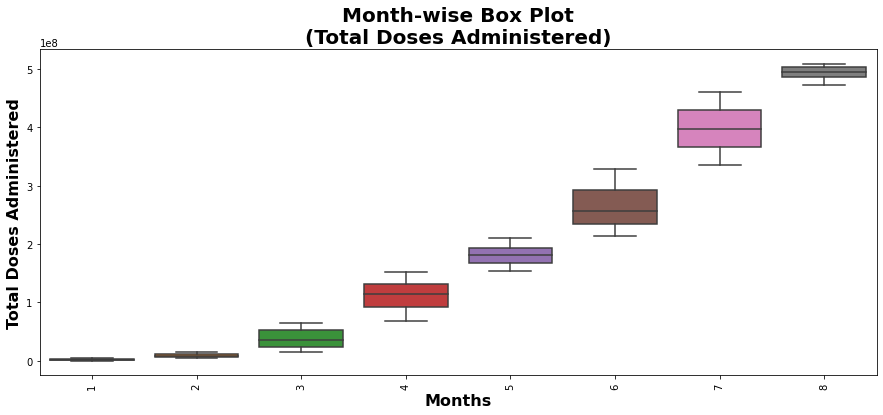

In [17]:

fig, ax = plt.subplots(figsize=(15, 6))


sns.boxplot(df['month'], df['total_vaccinations'])
plt.xticks(rotation=90)
ax.set_title('Month-wise Box Plot\n(Total Doses Administered)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Months', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Total Doses Administered', fontsize = 16, fontdict=dict(weight='bold'))


In [18]:

Confirmed = df[['date','total_vaccinations']]


In [19]:
Confirmed1 = df[['date','people_vaccinated']]
Confirmed2 = df[['date','people_fully_vaccinated']]

In [20]:
Confirmed.head()

,date,total_vaccinations
0,2021-01-15,0
1,2021-01-16,191181
2,2021-01-17,224301
3,2021-01-18,454049
4,2021-01-19,674835


In [21]:
Confirmed1.columns = ['ds','y']
Confirmed2.columns = ['ds','y']

In [22]:
Confirmed.columns = ['ds','y']

In [23]:
Confirmed1.tail()


,ds,y
192,2021-08-04,381126275
193,2021-08-05,385631050
194,2021-08-06,390041560
195,2021-08-07,394378151
196,2021-08-08,395667593


In [24]:
Confirmed.tail()


,ds,y
192,2021-08-04,489342295
193,2021-08-05,495327595
194,2021-08-06,501009609
195,2021-08-07,506810492
196,2021-08-08,508664759


In [25]:
from datetime import datetime
split = '2021-07-28'
split_f = datetime.strptime(split, '%Y-%m-%d')

In [26]:

#splitting dataset to perform on test data
train1 = Confirmed1[Confirmed1['ds'] < split_f]
test1 = Confirmed1[Confirmed1['ds'] >= split_f]


In [27]:

#splitting dataset to perform on test data
train2 = Confirmed2[Confirmed2['ds'] < split_f]
test2 = Confirmed2[Confirmed2['ds'] >= split_f]


In [28]:

#splitting dataset to perform on test data
train = Confirmed[Confirmed['ds'] < split_f]
test = Confirmed[Confirmed['ds'] >= split_f]


In [29]:
test.shape

(10, 2)

In [30]:
test

,ds,y
187,2021-07-28,450706257
188,2021-07-29,456033754
189,2021-07-30,461518479
190,2021-08-01,472223639
191,2021-08-03,485286570
192,2021-08-04,489342295
193,2021-08-05,495327595
194,2021-08-06,501009609
195,2021-08-07,506810492
196,2021-08-08,508664759


In [31]:
from fbprophet import Prophet
m1 = Prophet(interval_width=0.9,daily_seasonality=True,seasonality_mode='additive')

In [74]:
from fbprophet import Prophet
m2 = Prophet(interval_width=0.9,daily_seasonality=True)

In [33]:
from fbprophet import Prophet
m = Prophet(interval_width=0.9,daily_seasonality=True,seasonality_mode='additive')

In [34]:
#model fitting
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [35]:
m1.fit(train1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [75]:
m2.fit(train2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [51]:
future1 = m1.make_future_dataframe(periods=12)
future1.tail(7)
#future dataset to make prediction on

,ds
192,2021-08-02
193,2021-08-03
194,2021-08-04
195,2021-08-05
196,2021-08-06
197,2021-08-07
198,2021-08-08


In [52]:
future2 = m2.make_future_dataframe(periods=12)
future2.tail(7)
#future dataset to make prediction on

,ds
192,2021-08-02
193,2021-08-03
194,2021-08-04
195,2021-08-05
196,2021-08-06
197,2021-08-07
198,2021-08-08


In [53]:
future = m.make_future_dataframe(periods=12)
future.tail(7)
#future dataset to make prediction on

,ds
192,2021-08-02
193,2021-08-03
194,2021-08-04
195,2021-08-05
196,2021-08-06
197,2021-08-07
198,2021-08-08


In [54]:
#forecasting with model
forecast1 = m1.predict(future1)
forecast1[['ds','yhat','yhat_upper','yhat_lower']].tail(7)

,ds,yhat,yhat_upper,yhat_lower
192,2021-08-02,3.758442e+08,3.806600e+08,3.709876e+08
193,2021-08-03,3.791434e+08,3.845144e+08,3.739364e+08
194,2021-08-04,3.824388e+08,3.876035e+08,3.771178e+08
195,2021-08-05,3.861809e+08,3.915195e+08,3.806159e+08
196,2021-08-06,3.895363e+08,3.948664e+08,3.841099e+08
197,2021-08-07,3.932742e+08,3.997812e+08,3.873340e+08
198,2021-08-08,3.959257e+08,4.027335e+08,3.897124e+08


In [76]:
#forecasting with model
forecast2 = m2.predict(future2)
forecast2[['ds','yhat','yhat_upper','yhat_lower']].tail(7)

,ds,yhat,yhat_upper,yhat_lower
192,2021-08-02,1.010899e+08,1.030020e+08,9.920848e+07
193,2021-08-03,1.023306e+08,1.043103e+08,1.002069e+08
194,2021-08-04,1.033794e+08,1.055106e+08,1.012705e+08
195,2021-08-05,1.047841e+08,1.070279e+08,1.026576e+08
196,2021-08-06,1.060701e+08,1.085024e+08,1.037265e+08
197,2021-08-07,1.073487e+08,1.097745e+08,1.048599e+08
198,2021-08-08,1.082268e+08,1.109225e+08,1.054187e+08


In [56]:
#forecasting with model
forecast = m.predict(future)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail(7)

,ds,yhat,yhat_upper,yhat_lower
192,2021-08-02,4.760000e+08,4.796142e+08,4.724313e+08
193,2021-08-03,4.805153e+08,4.848260e+08,4.769812e+08
194,2021-08-04,4.847773e+08,4.892655e+08,4.807245e+08
195,2021-08-05,4.898821e+08,4.951343e+08,4.855534e+08
196,2021-08-06,4.945012e+08,5.004383e+08,4.894705e+08
197,2021-08-07,4.994792e+08,5.061624e+08,4.940714e+08
198,2021-08-08,5.029412e+08,5.104513e+08,4.964769e+08


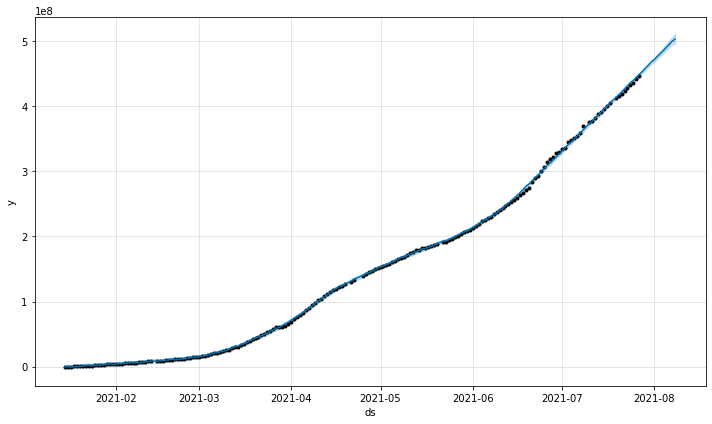

In [57]:
confirmed_forecast_plot = m.plot(forecast)


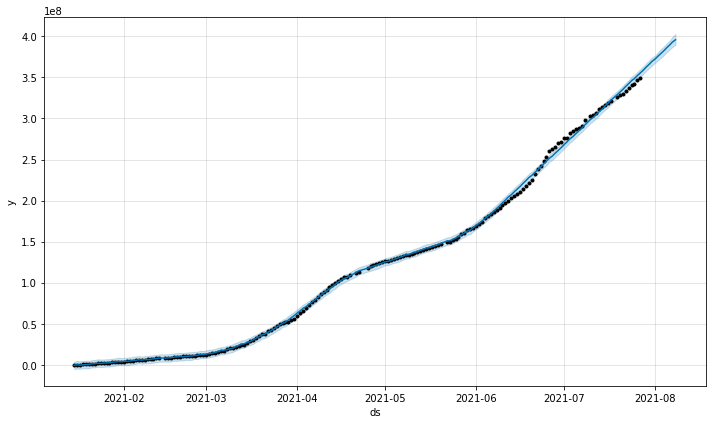

In [58]:
confirmed_forecast1_plot = m1.plot(forecast1)


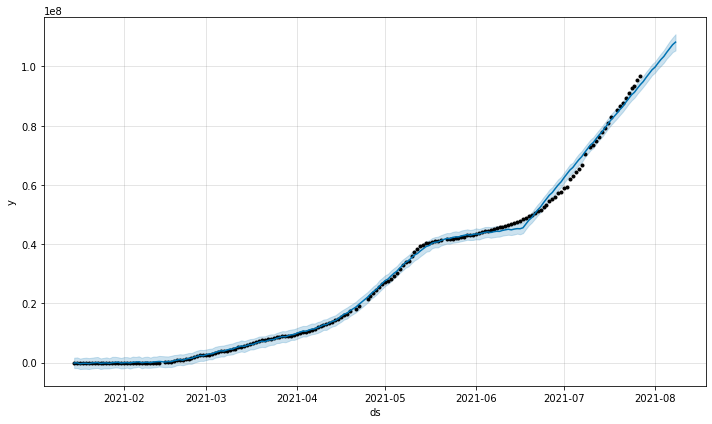

In [77]:
confirmed_forecast2_plot = m2.plot(forecast2)


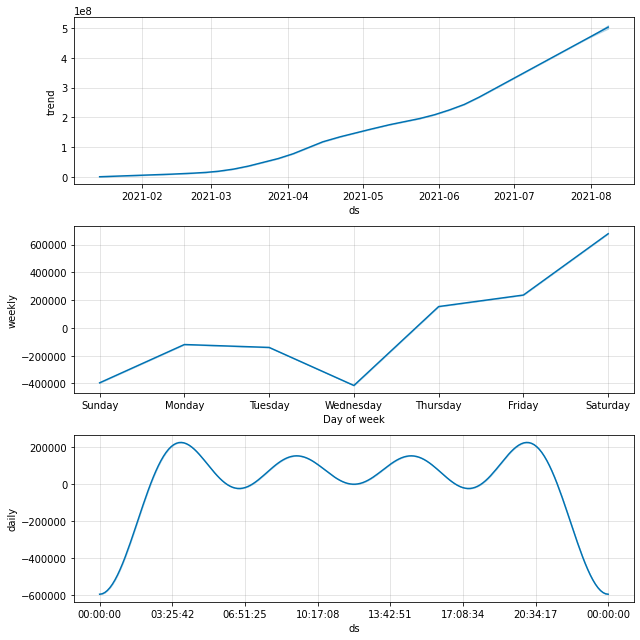

In [60]:
#plot components of forecast
confirmed_forecast_plot =m.plot_components(forecast)

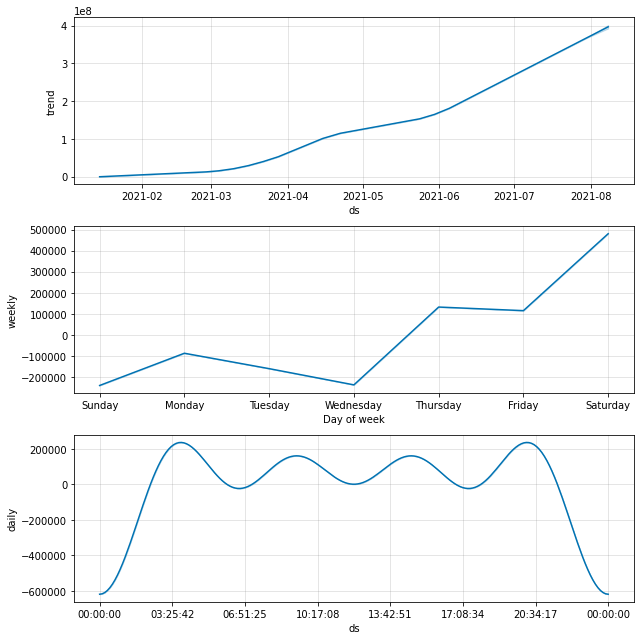

In [61]:
#plot components of forecast
confirmed_forecast1_plot =m1.plot_components(forecast1)

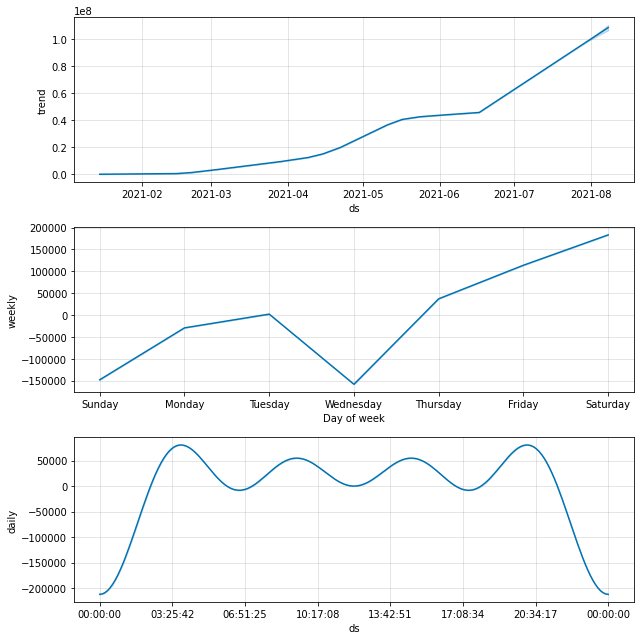

In [78]:
#plot components of forecast
confirmed_forecast2_plot =m2.plot_components(forecast2)

In [63]:
from sklearn.metrics import mean_absolute_error

MAE: 7152496.717


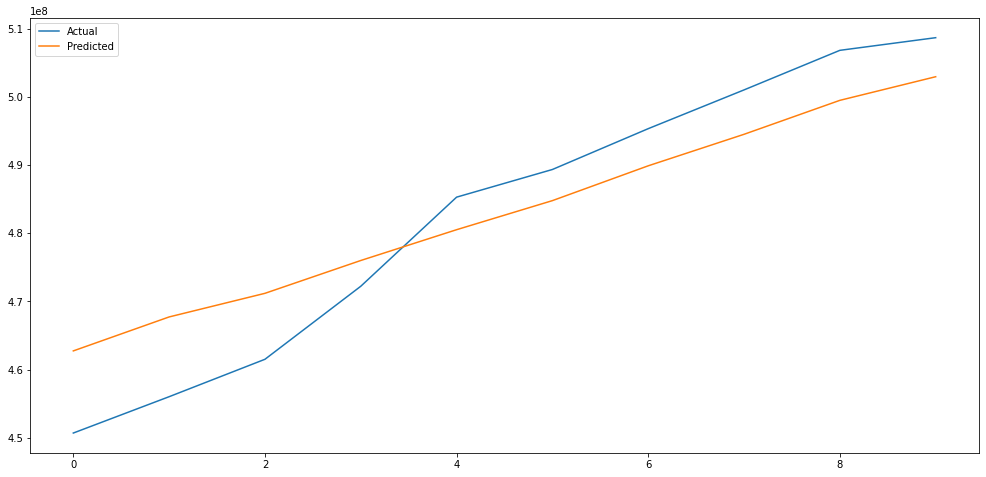

In [66]:
y_true = test['y'][-10:].values
y_pred = forecast['yhat'][-10:].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()


MAE: 5204074.062


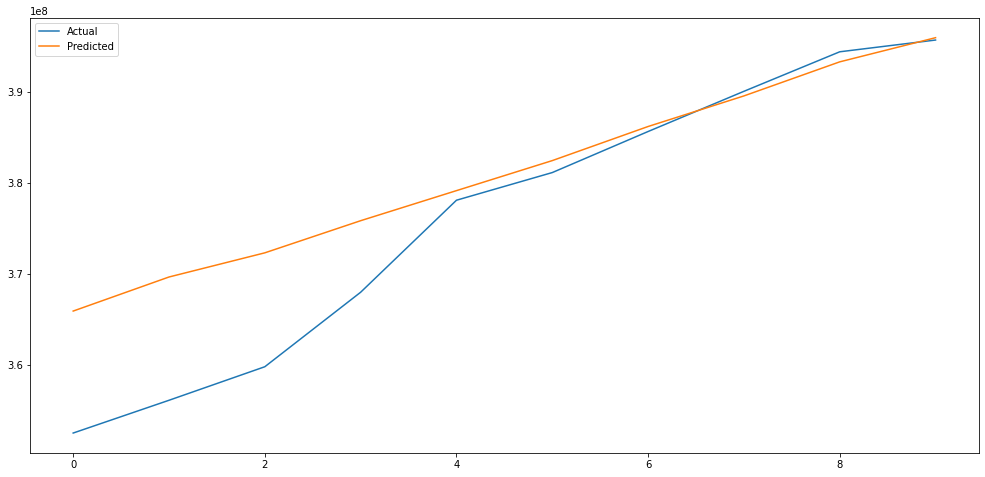

In [68]:
y_true1 = test1['y'][-10:].values
y_pred1 = forecast1['yhat'][-10:].values
mae = mean_absolute_error(y_true1, y_pred1)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true1, label='Actual')
plt.plot(y_pred1, label='Predicted')
plt.legend()


MAE: 1885379.438


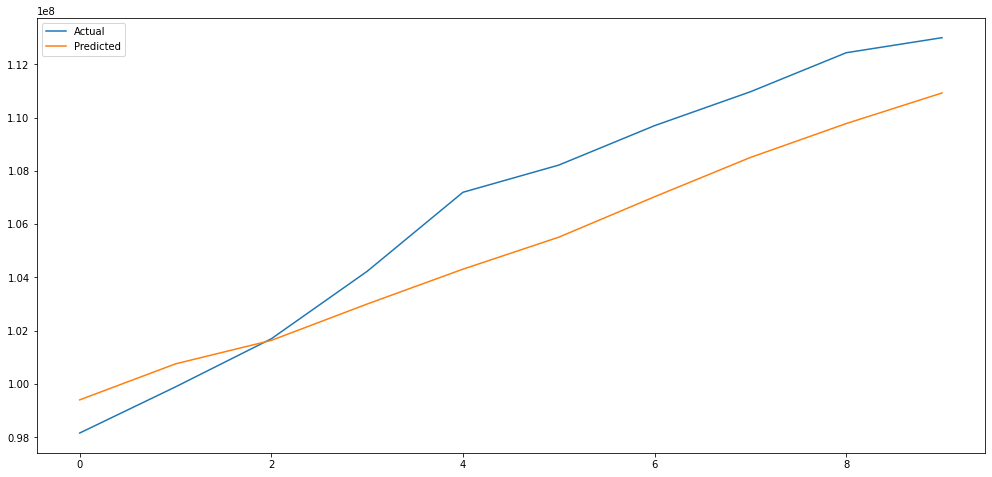

In [79]:
y_true2 = test2['y'][-10:].values
y_pred2 = forecast2['yhat_upper'][-10:].values
mae = mean_absolute_error(y_true2, y_pred2)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true2, label='Actual')
plt.plot(y_pred2, label='Predicted')
plt.legend()


In [71]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

In [72]:
fig1 = plot_plotly(m1, forecast1)  # This returns a plotly Figure
py.iplot(fig1)

In [80]:
fig2 = plot_plotly(m2, forecast2)  # This returns a plotly Figure
py.iplot(fig2)

In [84]:
perc = 1.109225e+08/1394790627 

In [85]:
perc

0.07952627287048725